# Sea ice data

In [2]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy
import cartopy.crs as ccrs

%load_ext autoreload
%autoreload 2
import functions as f

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


## List data

In [3]:
s3.ls('escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/')[::-1]

['escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191231-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191230-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191229-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191228-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191227-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191226-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191225-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191224-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191223-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191222-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191221-v5.4.nc',
 'escience

## Open single files

In [11]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20150930-v5.4.nc'
file = s3.open(s3file)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:21:13 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

## Plot

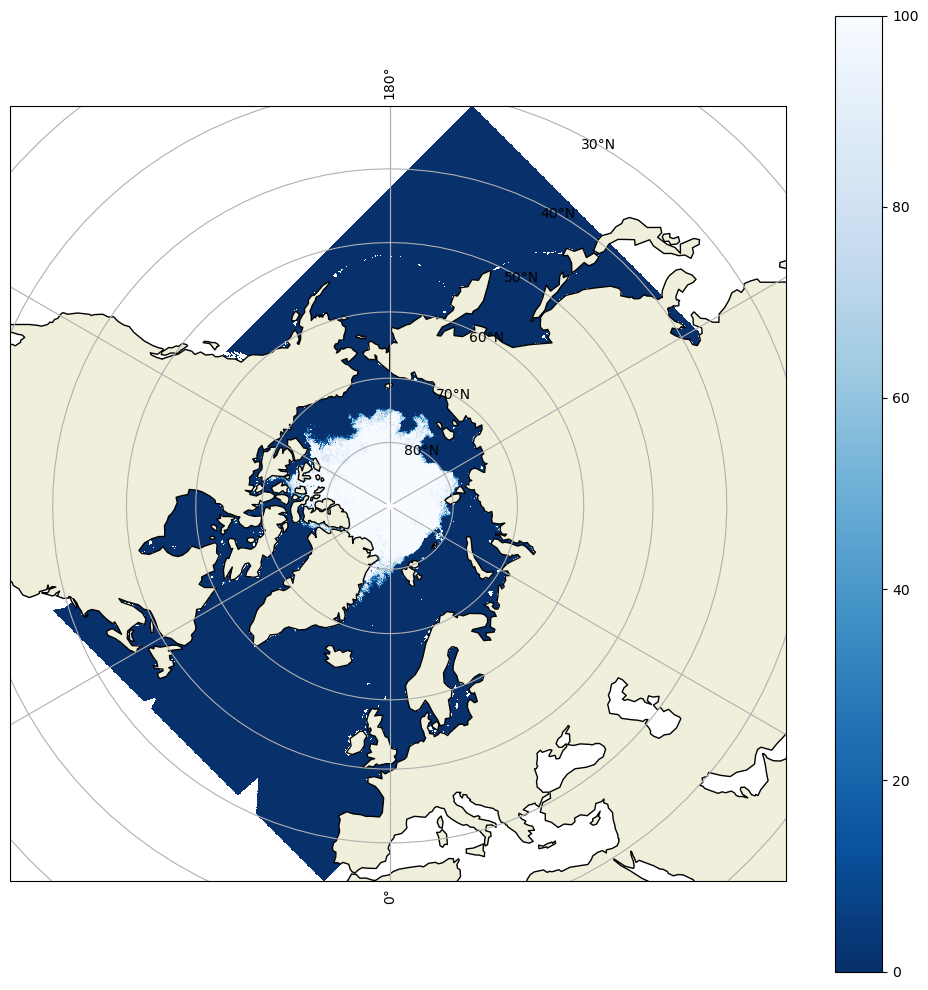

In [12]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

# ax.set_extent( [-180,180, 60,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Chukchi

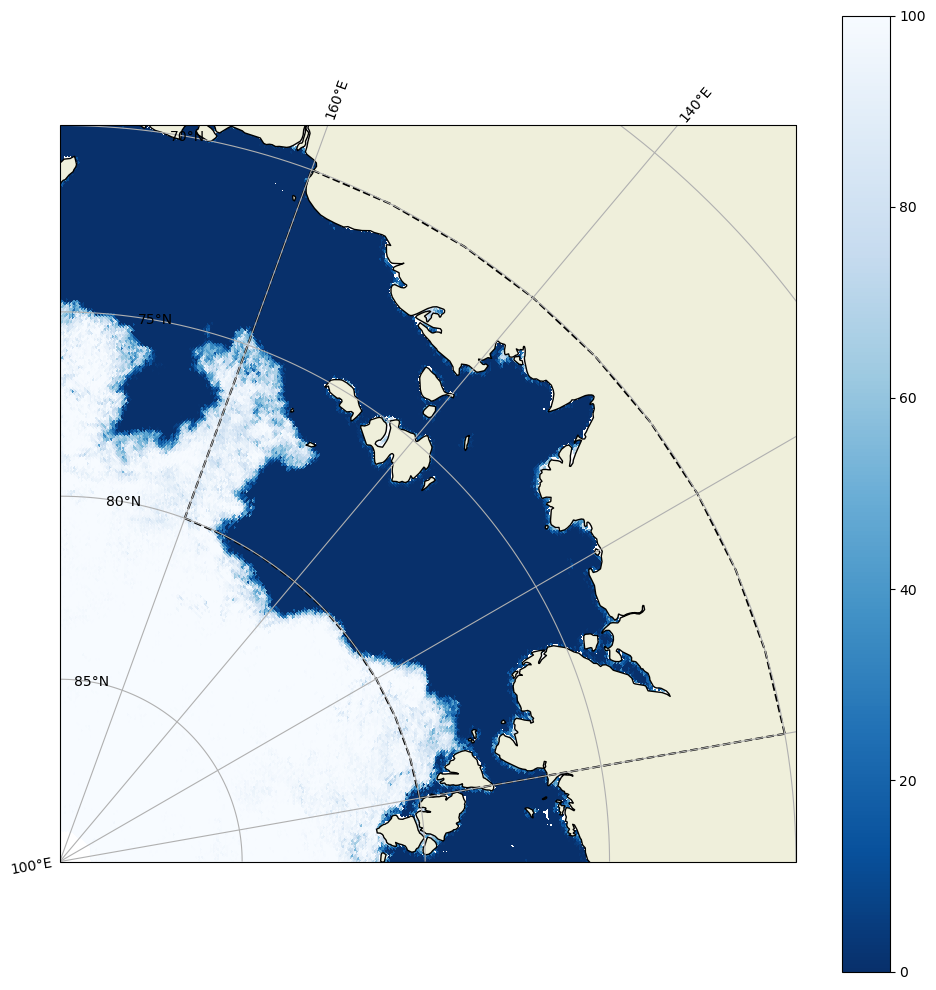

In [13]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

chukchi = [100,160, 70,80]

f.rect(ax, chukchi )
ax.set_extent( [90,180, 70,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()


## Canadian archipelago

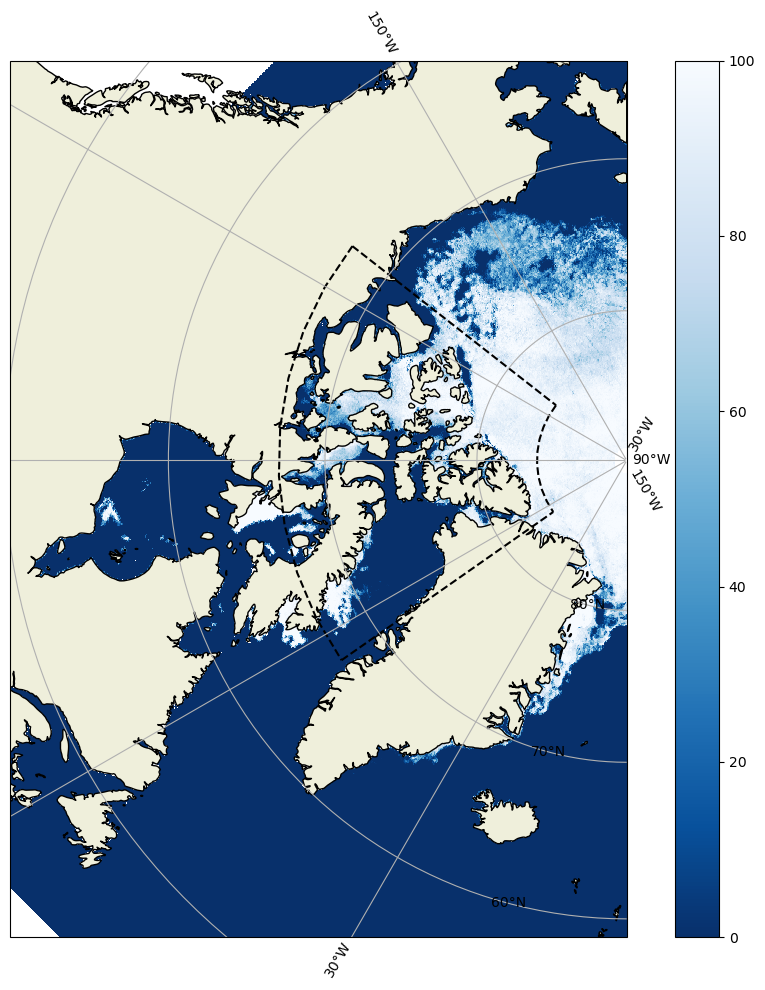

In [9]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

caa = [-128,-55, 67,84]
f.rect(ax, caa )
ax.set_extent( [-130,-40, 50,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Sea ice extent

In [23]:
siExt = xr.where(ds.z>15,1.,np.NaN)
siExt

<xarray.DataArray 'z' (y: 1792, x: 1216)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06

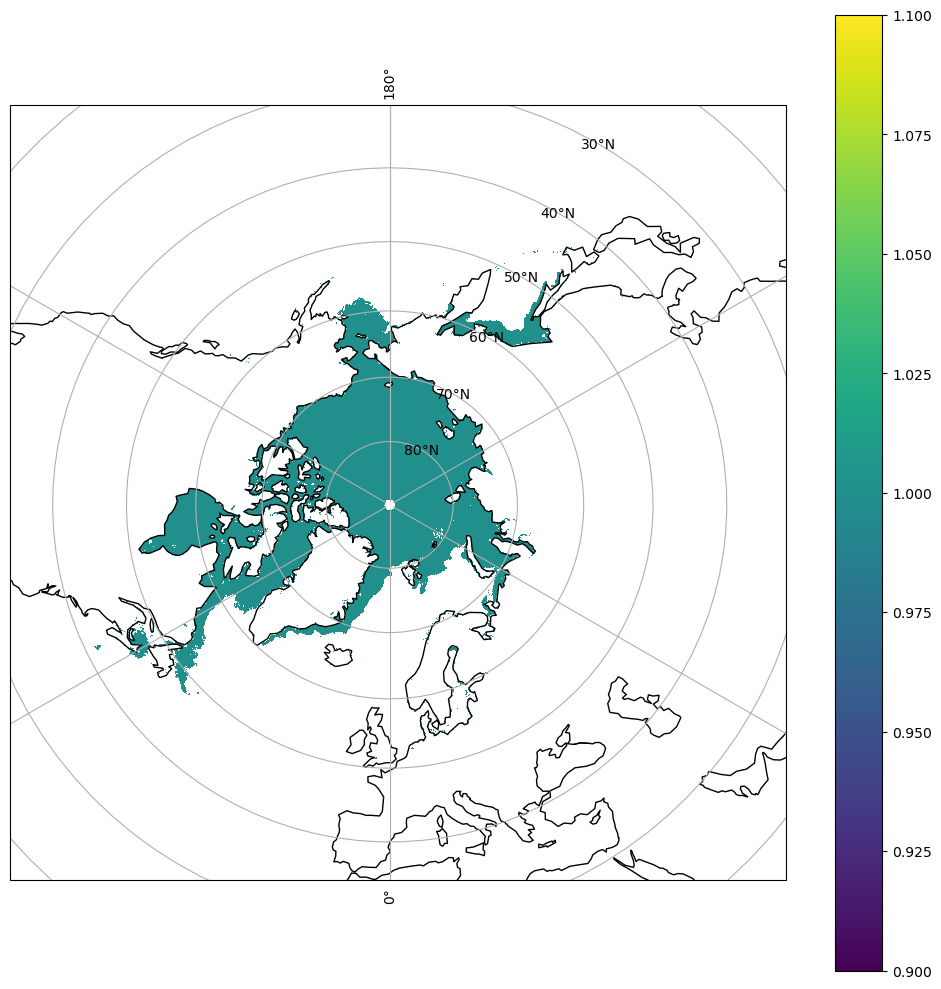

In [26]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(siExt.x, siExt.y, siExt,
    transform=ccrs.epsg(3411),
        )
plt.colorbar()
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()


<xarray.DataArray 'z' (y: 1792, x: 1216)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic